- yfinance
    - conda install yfinance
    - pip install yfinance
- pandas-datareader
    - conda install pandas-datareader
    - pip install pandas-datareader
- fbprophet
    - MS C++ build tools : https://visualstudio.microsoft.com/visual-cpp-build-tools/
    - conda install -c conda-forge fbprophet
    - pip install fbprophet
    - 설치 Error 시 참고 : https://stackoverflow.com/questions/53178281/installing-fbprophet-python-on-windows-10

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from fbprophet import Prophet
from pandas_datareader import data

In [2]:
yf.pdr_override()

In [3]:
start_date = "2015-03-10"
end_date = "2021-10-01"
kia = data.get_data_yahoo("003490.KS", start_date, end_date)
kia

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-10,43633.078125,44012.496094,42731.960938,42779.390625,42343.613281,364421
2015-03-11,42589.679688,42921.671875,41688.562500,41688.562500,41263.898438,540900
2015-03-12,41451.425781,42969.097656,40977.152344,42542.253906,42108.894531,572992
2015-03-13,43158.808594,43490.796875,41166.863281,41593.707031,41170.007812,709642
2015-03-16,42210.261719,44818.761719,41973.125000,44107.351562,43658.050781,954998
...,...,...,...,...,...,...
2021-09-24,34450.000000,34500.000000,33850.000000,34250.000000,34250.000000,3886703
2021-09-27,34200.000000,34950.000000,33850.000000,34250.000000,34250.000000,3901857
2021-09-28,34250.000000,34250.000000,33300.000000,33700.000000,33700.000000,3138657


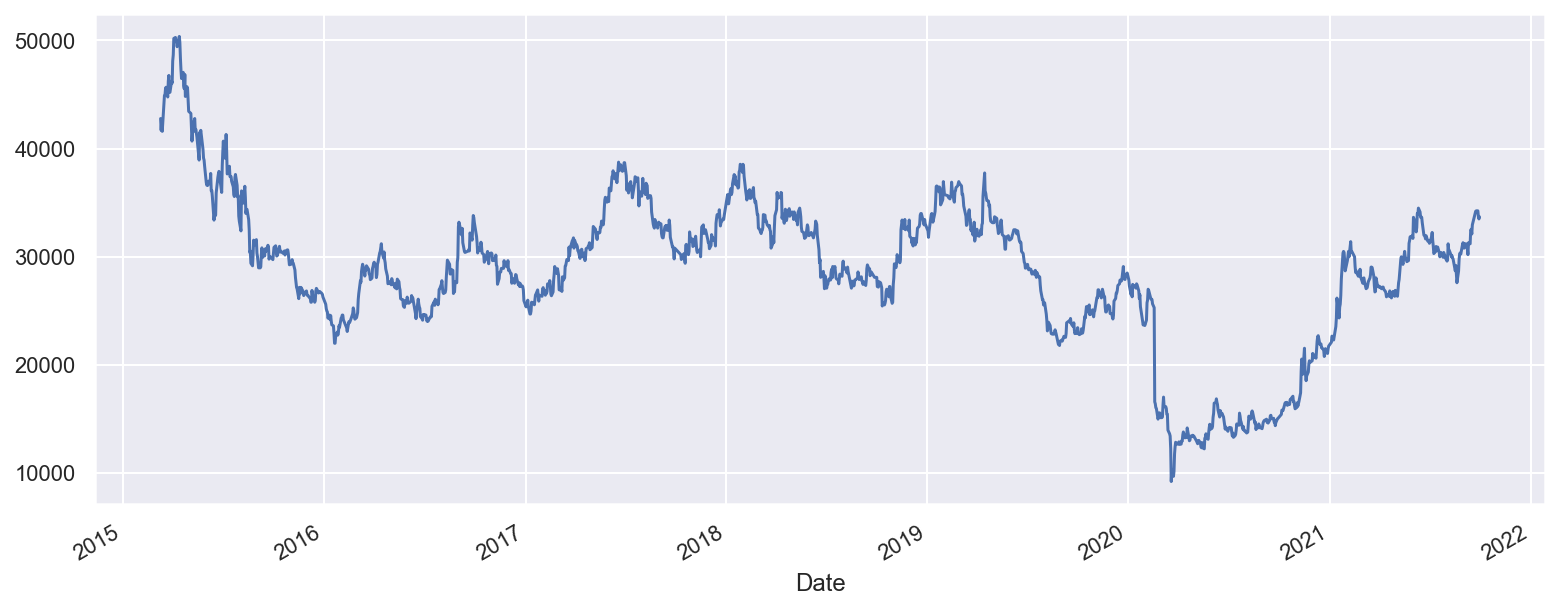

In [5]:
kia["Close"].plot(grid=True, figsize=(13, 5));

In [7]:
kia_tmp = kia[:"2021-08-01"]
kia_tmp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-26,30150.0,30200.0,29900.0,29950.0,29950.0,1235451
2021-07-27,30050.0,30900.0,30050.0,30400.0,30400.0,1537720
2021-07-28,30250.0,30400.0,29950.0,30150.0,30150.0,1241849
2021-07-29,30250.0,30450.0,30050.0,30150.0,30150.0,764383
2021-07-30,30100.0,30150.0,29900.0,29900.0,29900.0,1332561


In [9]:
kia_trunc = pd.DataFrame({
    "ds":kia_tmp.index,
    "y":kia_tmp["Close"]
})
kia_trunc.reset_index(inplace=True)
del kia_trunc["Date"]

In [10]:
kia_trunc

,ds,y
0,2015-03-10,42779.390625
1,2015-03-11,41688.562500
2,2015-03-12,42542.253906
3,2015-03-13,41593.707031
4,2015-03-16,44107.351562
...,...,...
1565,2021-07-26,29950.000000
1566,2021-07-27,30400.000000
1567,2021-07-28,30150.000000
1568,2021-07-29,30150.000000


In [11]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(kia_trunc)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1625,2021-09-24,31789.460127,29741.304759,35711.612534,31514.088591,32134.458075,921.841438,921.841438,921.841438,2404.492775,...,143.901117,143.901117,143.901117,-1626.552455,-1626.552455,-1626.552455,0.0,0.0,0.0,32711.301565
1626,2021-09-25,31832.227673,29356.076201,35335.577693,31533.300270,32190.723788,494.541854,494.541854,494.541854,2404.492775,...,-300.561584,-300.561584,-300.561584,-1609.389337,-1609.389337,-1609.389337,0.0,0.0,0.0,32326.769527
1627,2021-09-26,31874.995219,29010.453924,35283.916391,31566.260670,32267.773224,508.552745,508.552745,508.552745,2404.492775,...,-300.561641,-300.561641,-300.561641,-1595.378389,-1595.378389,-1595.378389,0.0,0.0,0.0,32383.547965
1628,2021-09-27,31917.762766,29675.226971,35900.138336,31601.897000,32316.779983,935.074828,935.074828,935.074828,2404.492775,...,115.237792,115.237792,115.237792,-1584.655740,-1584.655740,-1584.655740,0.0,0.0,0.0,32852.837594
1629,2021-09-28,31960.530312,30095.561102,36056.639120,31631.990507,32372.316528,914.144054,914.144054,914.144054,2404.492775,...,86.983555,86.983555,86.983555,-1577.332277,-1577.332277,-1577.332277,0.0,0.0,0.0,32874.674366


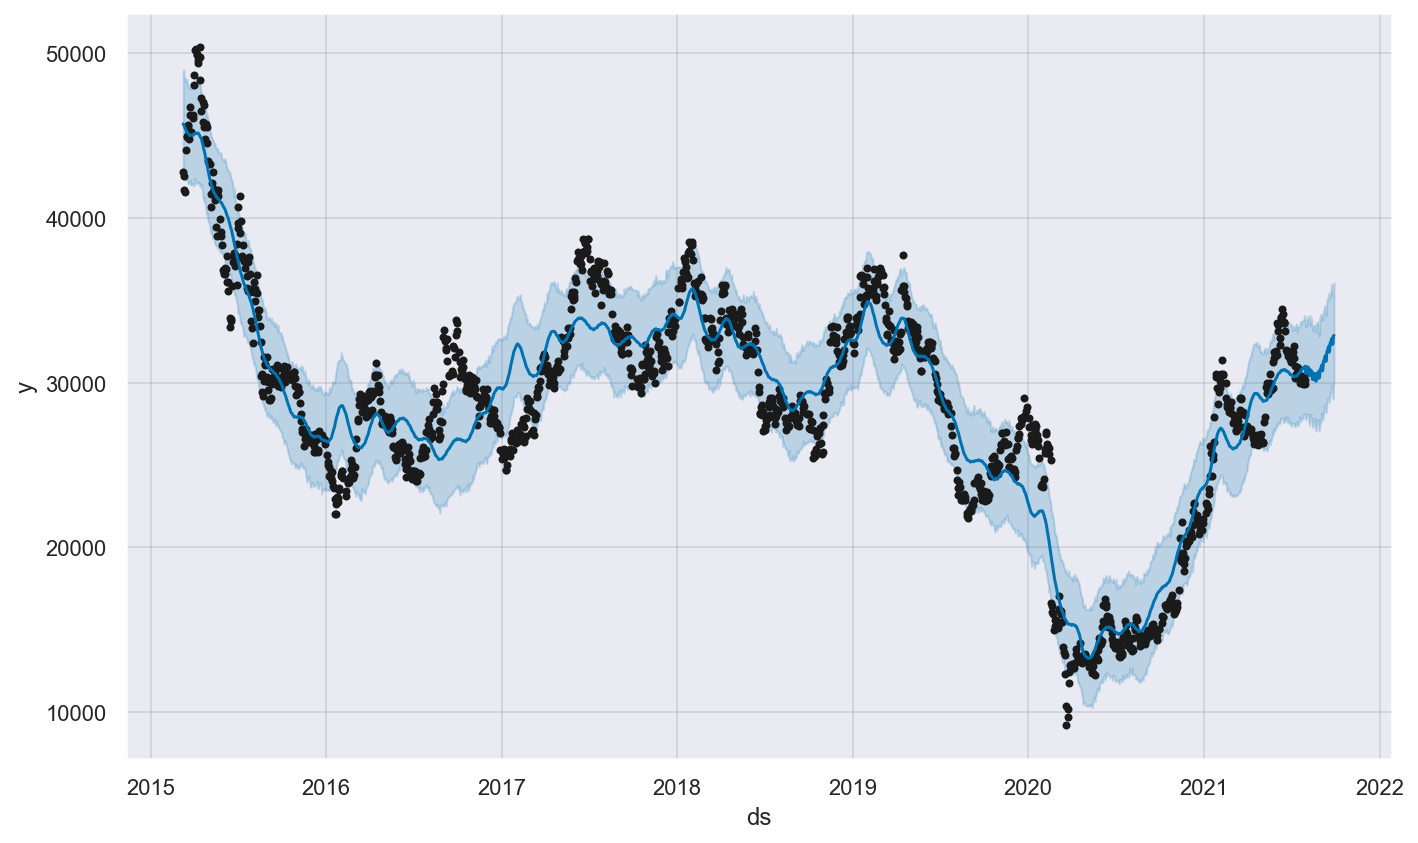

In [14]:
m.plot(forecast[["ds", "yhat", "yhat_upper", "yhat_lower"]]);

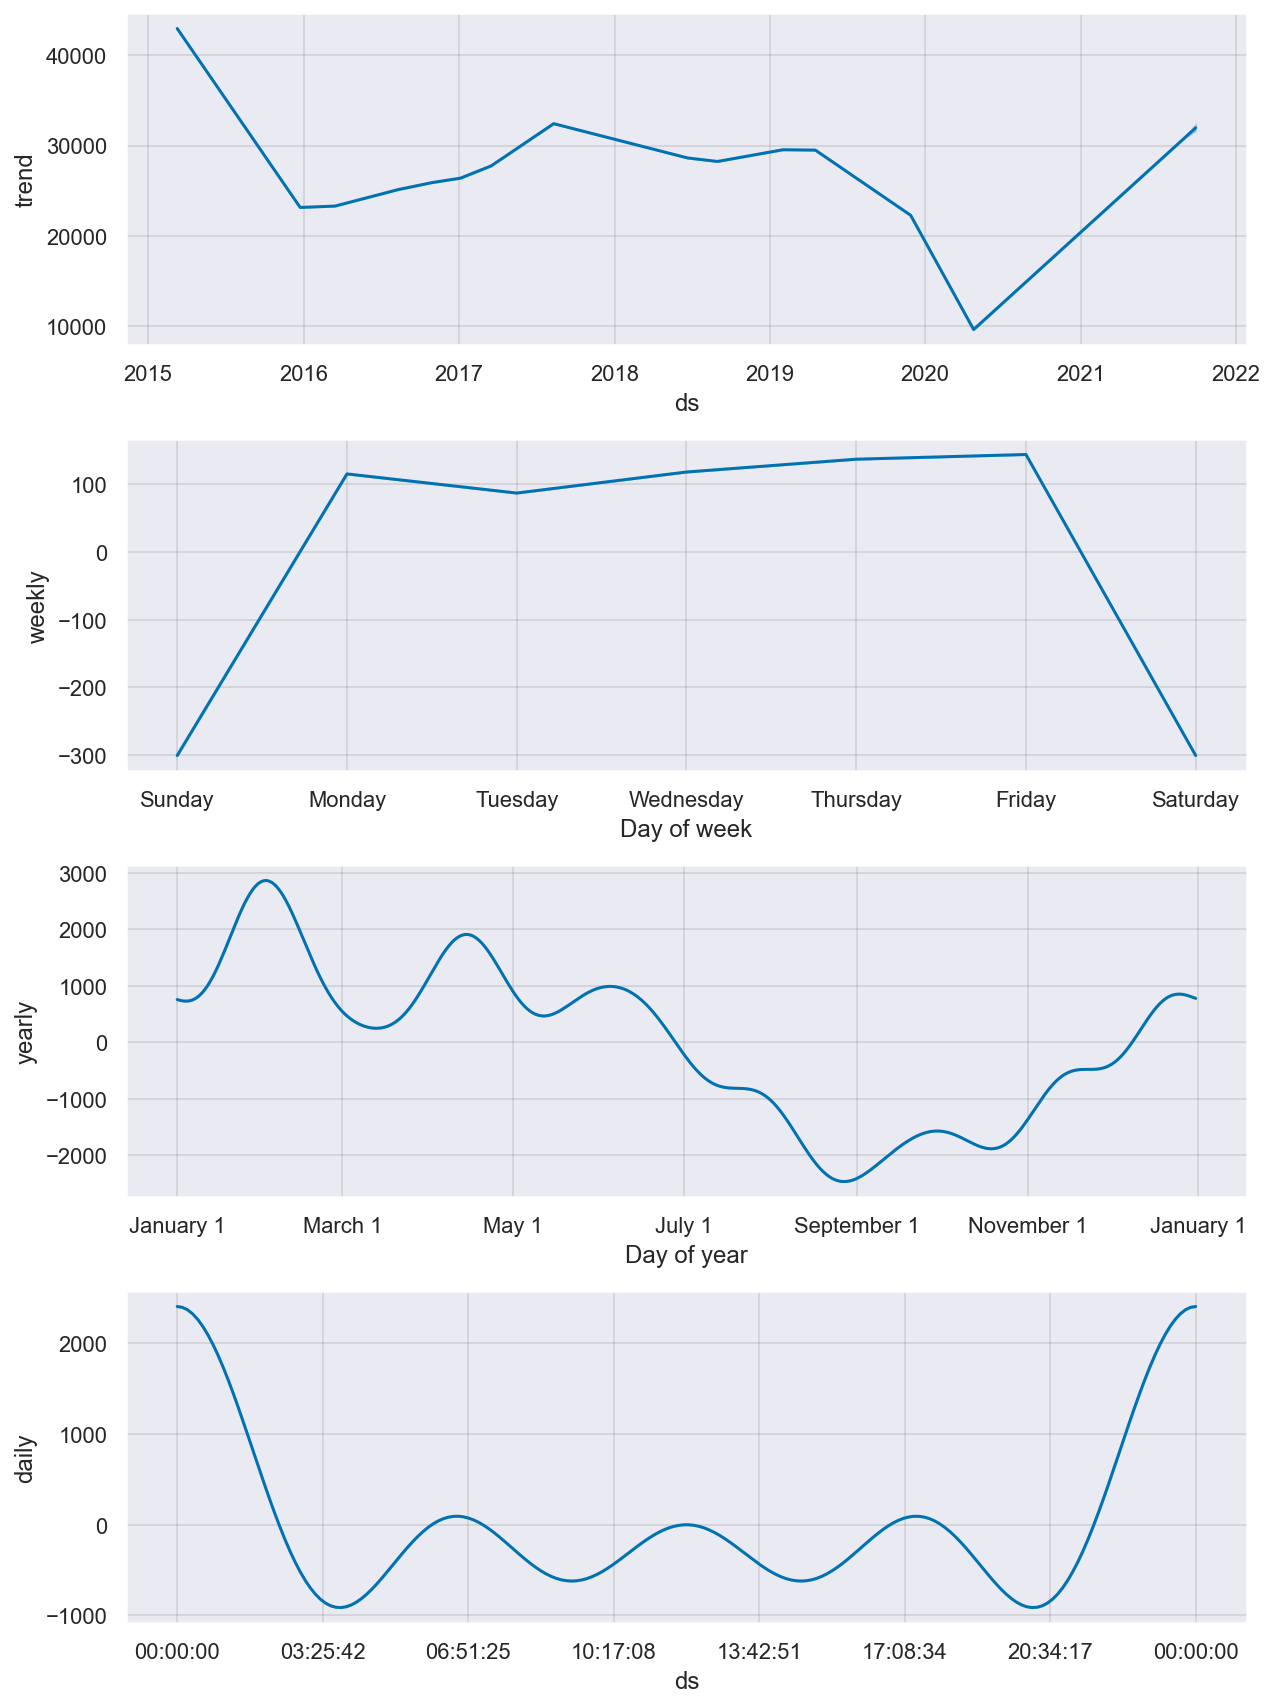

In [16]:
m.plot_components(forecast);

In [17]:
%matplotlib inline

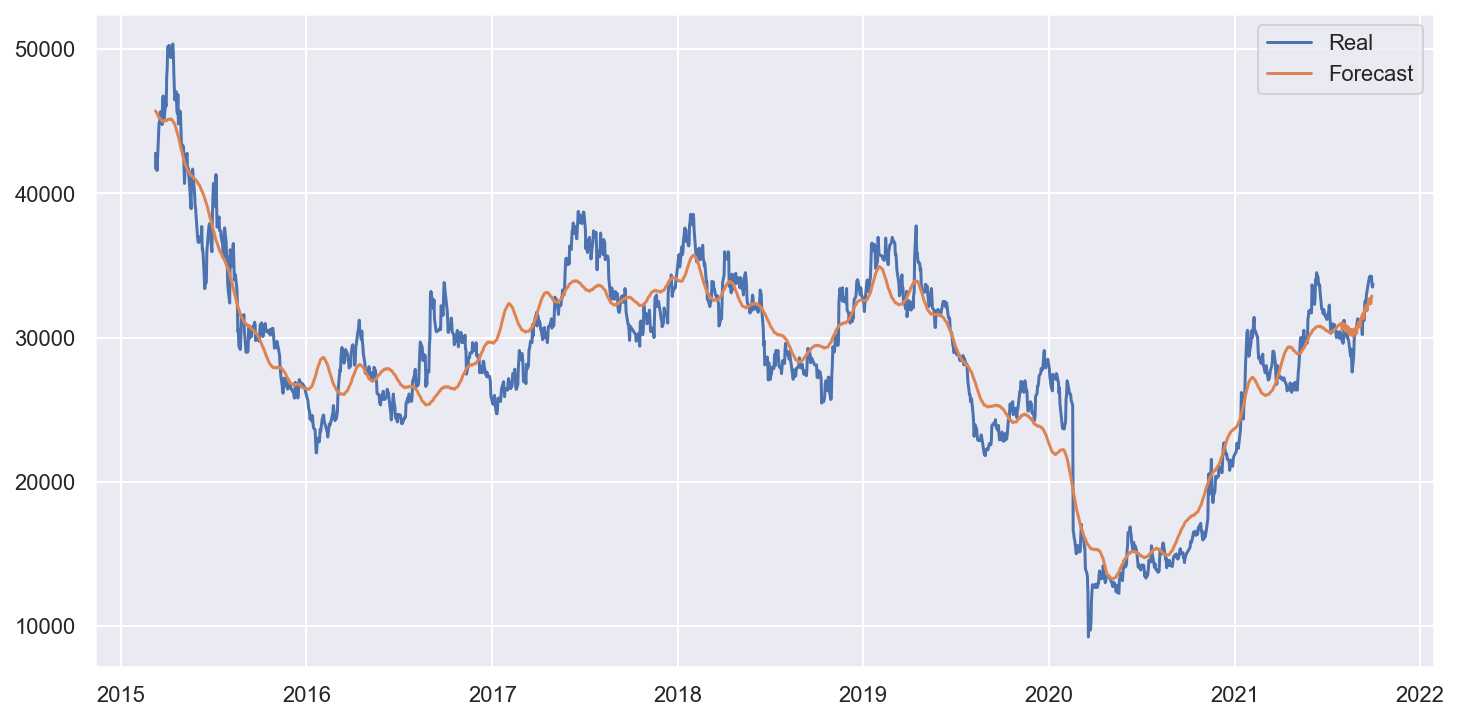

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(kia.index, kia["Close"], label="Real")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecast")
plt.legend()
plt.show()